# 作業目標:¶
利用手寫辨識資料說明 MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label), (x_test_image,y_test_label) = mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# 建立模型
model = Sequential()

model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [10]:
train_history = model.fit(x=x_Train_normalize,
                          y=y_Train_OneHot, validation_split=0.2, 
                          epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2331 - accuracy: 0.9316 - val_loss: 0.1245 - val_accuracy: 0.9624
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0909 - accuracy: 0.9712 - val_loss: 0.1066 - val_accuracy: 0.9688
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0641 - accuracy: 0.9799 - val_loss: 0.0922 - val_accuracy: 0.9734
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9851 - val_loss: 0.0920 - val_accuracy: 0.9752
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9885 - val_loss: 0.0960 - val_accuracy: 0.9767
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.1090 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9922 - val_loss: 0.0960 - val_accuracy:

# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

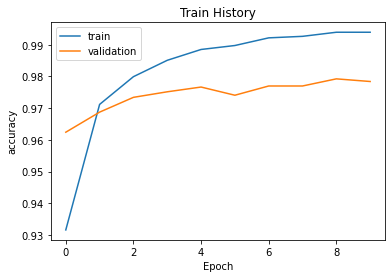

In [12]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

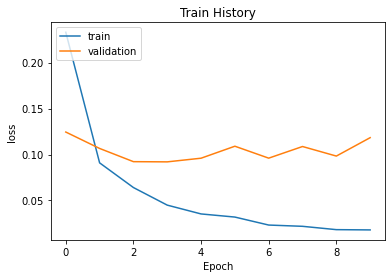

In [13]:
show_train_history(train_history, 'loss', 'val_loss')

# 評估模型準確率

In [14]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print(f'accuracy = {scores[1]:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1090 - accuracy: 0.9770

accuracy = 0.9770
